In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("top50.csv", encoding='ISO-8859-1' )
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
df.shape

(50, 14)

In [4]:
df.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
df.describe(include="all")

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50,50,50,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,50,38,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Goodbyes (Feat. Young Thug),Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,NaN,NaN,NaN,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,NaN,NaN,NaN,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,NaN,NaN,NaN,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,NaN,NaN,NaN,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,NaN,NaN,NaN,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000


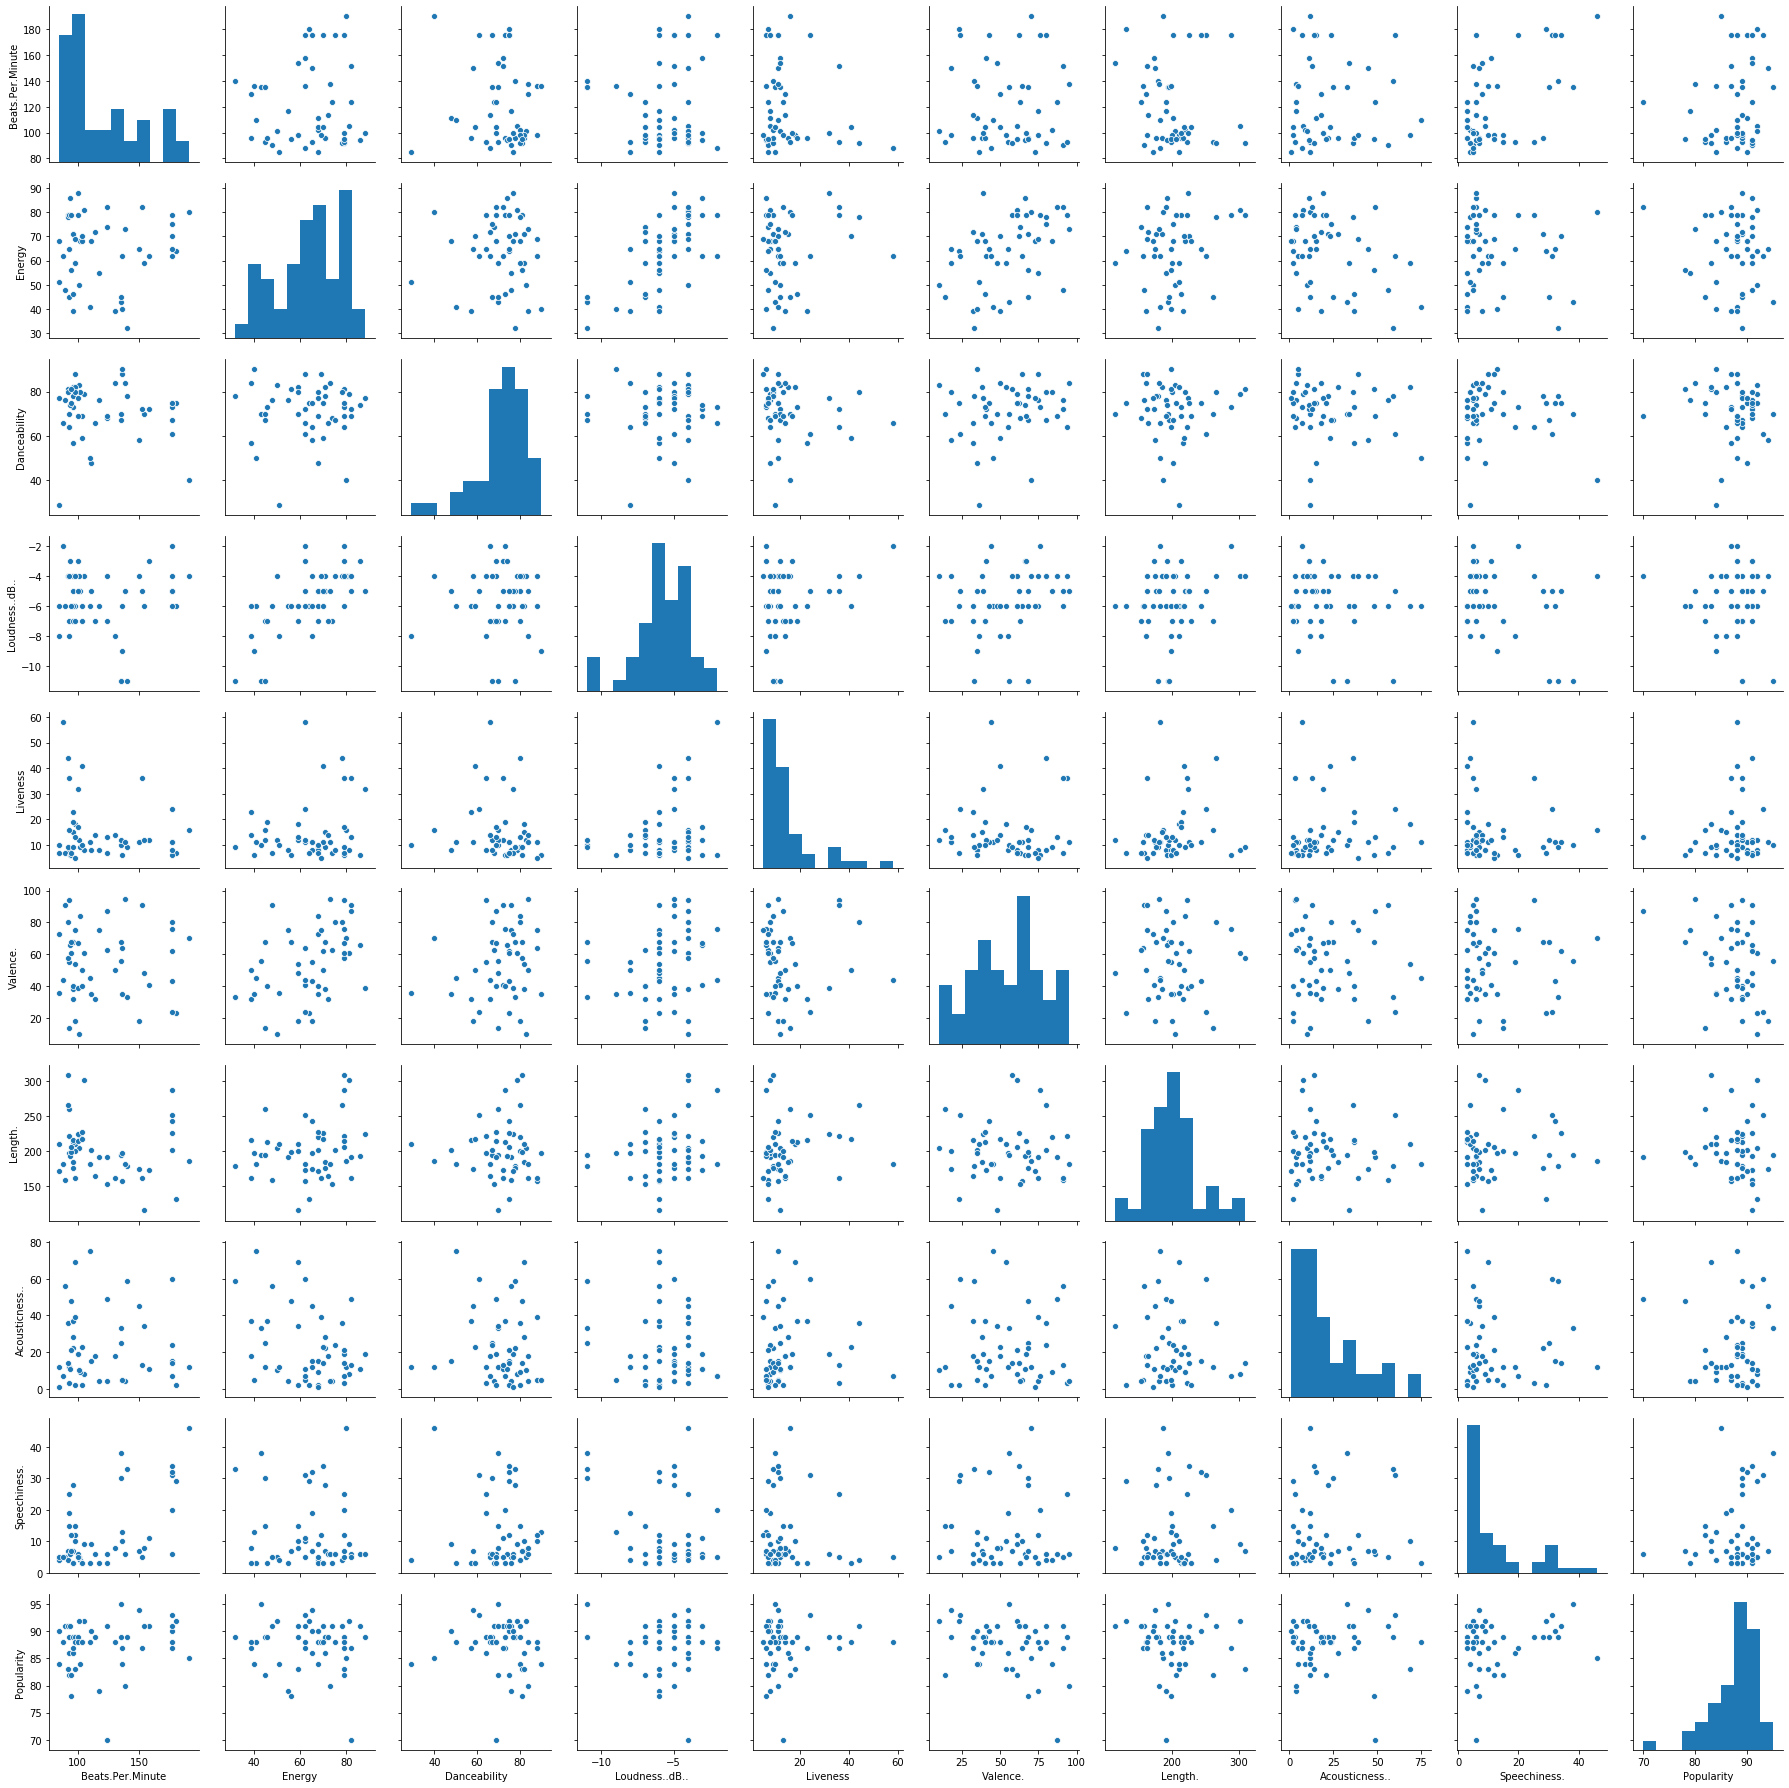

In [7]:
sns.pairplot(df)

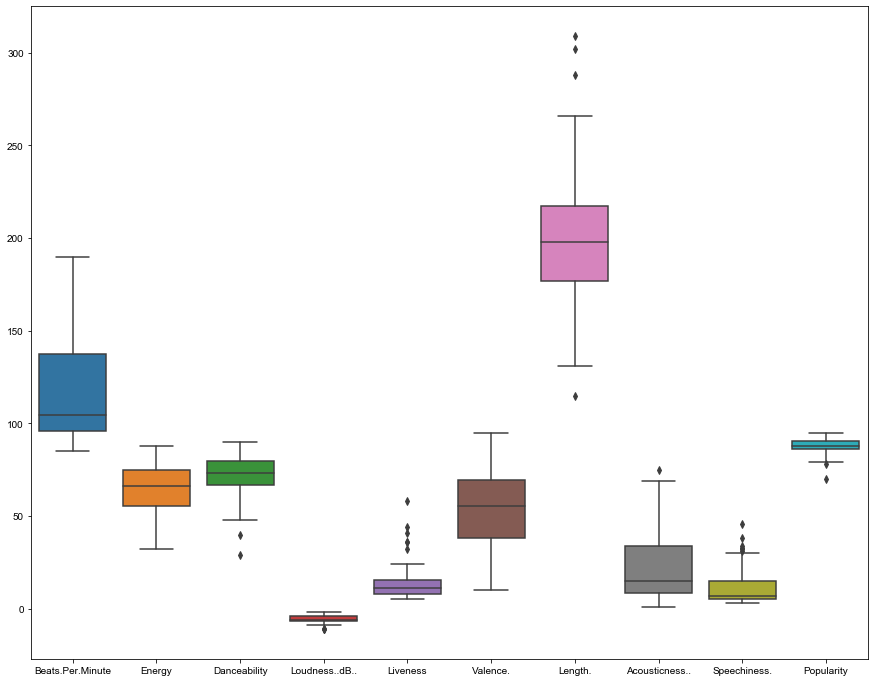

In [8]:
fig, ax = plt.subplots(figsize=(15,12))
sns.set_style("whitegrid") 
sns.boxplot(data=df, ax=ax)

Genres with More Populartiy

Text(0.5, 1.0, 'Top 5 Genre based on Popularity Rank')

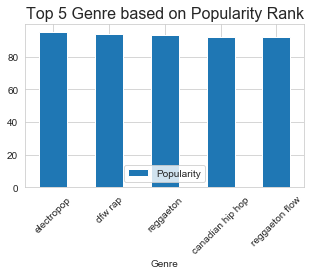

In [9]:
df_gvp = df[['Genre','Popularity']]
df_top5_gvp = df_gvp.sort_values(['Popularity'], ascending=False).head(5)
df_top5_gvp.plot(kind='bar',x='Genre', rot=45, figsize=(5,3))
plt.title('Top 5 Genre based on Popularity Rank', size=16)

Text(0.5, 1.0, 'Most Popular Genres')

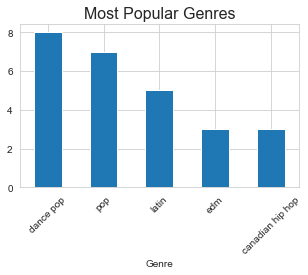

In [10]:
df_top5_g = df.groupby('Genre').size().sort_values(ascending=False).head()
df_top5_g.plot(kind='bar', rot=45, figsize=(5,3))
plt.title('Most Popular Genres', size=16)

Text(0.5, 1.0, 'Most Popular Artists')

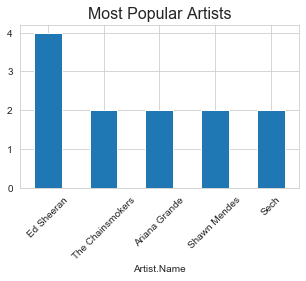

In [11]:
df_top5_g = df.groupby('Artist.Name').size().sort_values(ascending=False).head()
df_top5_g.plot(kind='bar', rot=45, figsize=(5,3))
plt.title('Most Popular Artists', size=16)

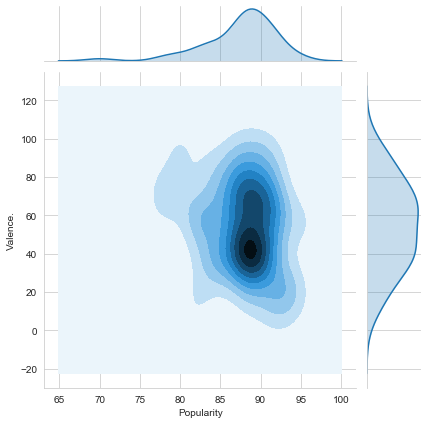

In [12]:
sns.jointplot(x="Popularity", y="Valence.", data=df, kind="kde")

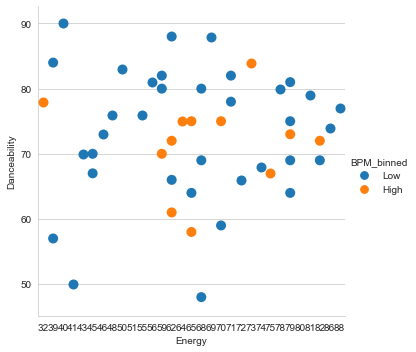

In [13]:
bpm = df['Beats.Per.Minute']
binwidth = int((max(bpm)-min(bpm))/2)
bins = range(min(bpm), max(bpm), binwidth)
group_names= ['Low', 'High']
df['BPM_binned'] = pd.cut(df['Beats.Per.Minute'], bins, labels=group_names)

sns.catplot(x="Energy", y="Danceability",hue="BPM_binned", s=10, data=df, kind="swarm")